In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('C:/Users/ADMIN/Desktop/Image_Processing/sample_image.png')

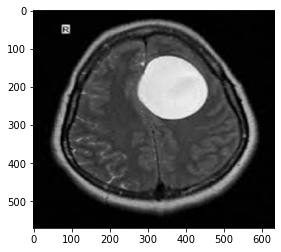

In [3]:
plt.imshow(image)
plt.show()

In [4]:
#converting the original img to rgb
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [5]:
#Transform image into 'data'
pixel_values = image.reshape((-1, 3))

pixel_values = np.float32(pixel_values)

In [6]:
print(pixel_values.shape)

(361443, 3)


In [7]:
 # Define the algorithm termination criteria (the maximum number of iterations and/or the desired accuracy)
    # In this case the maximum number of iterations is set to 100 and epsilon = 0.2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [8]:
#Apply K-means clustering algorithm
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [9]:
# At this point we can make the image with k colors
    # Convert center to uint8
centers = np.uint8(centers)

# Replace pixel values with their center value
labels = labels.flatten()

In [10]:
segmented_image = centers[labels.flatten()]

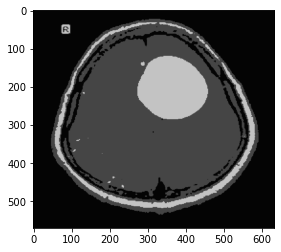

In [11]:
segmented_image = segmented_image.reshape(image.shape)

plt.imshow(segmented_image)
plt.show()

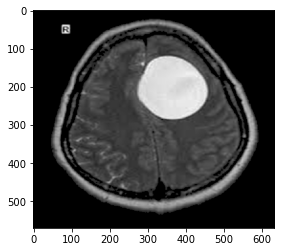

In [12]:
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()
